In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import TruncatedSVD
from google.colab import drive
from PIL import Image

Mounted at /content/drive


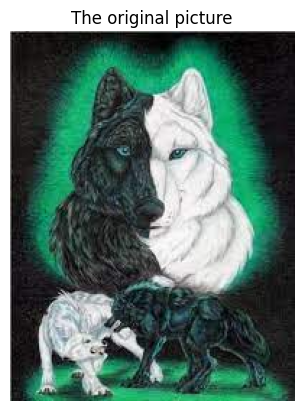

In [15]:
# Download and vision original picture
drive.mount('/content/drive', force_remount=True)
image_path = '/content/drive/My Drive/Numeric_Programming/Wolfs.jfif'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Invert BGR in RGB
plt.imshow(image)
plt.axis('off')
plt.title("The original picture")
plt.show()

In [16]:
# Getting the size of picture

height, width, channels = image.shape
print(f'The size of picture: {height}x{width}, The quantity of channels: {channels}')


The size of picture: 256x197, The quantity of channels: 3


In [18]:
# Transfert picture in 2D-matrix
flat_image = image.reshape(-1, width*channels)

# Useing SVD-decomposition

U, S, Vt = np.linalg.svd(flat_image, full_matrices=False)
print("SVD done sucsesfully!")

SVD виконано успішно!


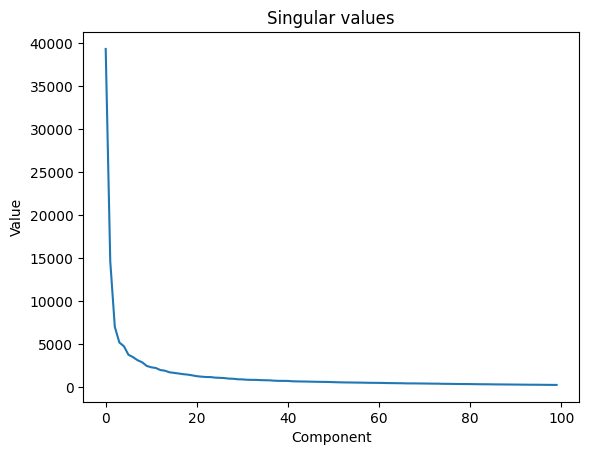

In [20]:
# Visualization of the first k values of the matrix Σ
k=100
plt.plot(np.arange(k), S[:k])
plt.title('Singular values')
plt.xlabel('Component')
plt.ylabel('Value')
plt.show()

In [23]:
# Truncated SVD for image compression
svd=TruncatedSVD(n_components=k)
truncated_image = svd.fit_transform(flat_image)
reconstructed_image=svd.inverse_transform(truncated_image)

# Calculafing the reconstruction of error
reconstruction_error=np.mean(np.square(reconstructed_image - flat_image))
print(f'The error of reconstruction: {reconstruction_error}')

The error of reconstruction: 10.989914914024546


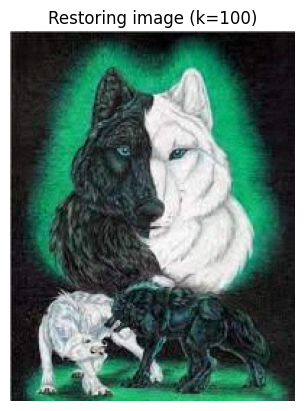

In [25]:
# Restoring the 3D-structure of the image
reconstructed_image=reconstructed_image.reshape(height, width, channels)
reconstructed_image=np.clip(reconstructed_image, 0, 255).astype('uint8')

# Visualization of the restored image
plt.imshow(reconstructed_image)
plt.axis('off')
plt.title(f'Restoring image (k={k})')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

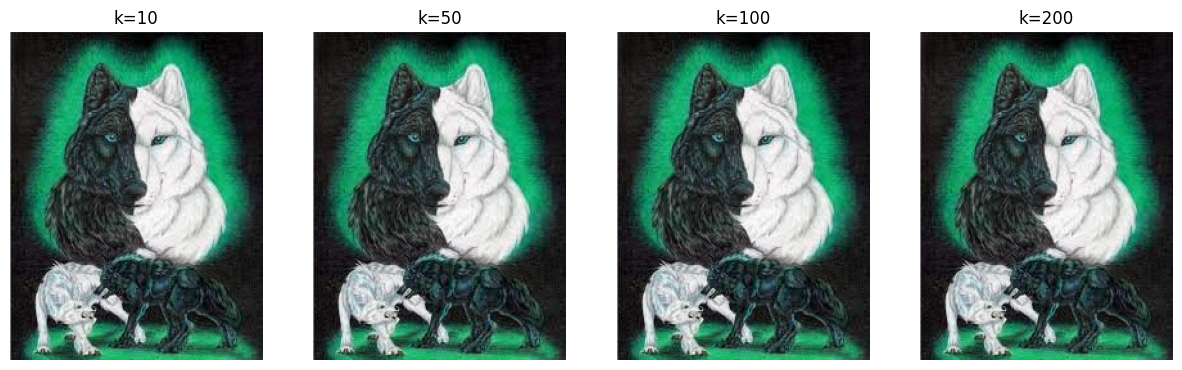

In [26]:
# Experiments with different values of k
k_values = [10, 50, 100, 200]
fig, axes = plt.subplots(1, len(k_values), figsize=(15,5))
for i, k in enumerate(k_values):
  svd = TruncatedSVD(n_components=k)
  truncated_image=svd.fit_transform(flat_image)
  reconstructed_image=reconstructed_image.reshape(height, width, channels)
  reconstructed_image=np.clip(reconstructed_image, 0, 255).astype('uint8')
  axes[i].imshow(reconstructed_image)
  axes[i].axis('off')
  axes[i].set_title(f'k={k}')
plt.show